In [2]:
import numpy as np 

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split   
from sklearn.metrics import classification_report, confusion_matrix 

import matplotlib.pyplot as plt 
import seaborn as sns

import cv2   

from utils.functions import Functions

In [3]:
%matplotlib inline

In [4]:
func = Functions() 

In [5]:
images_path = './images'
sample_image = cv2.imread(f'{images_path}/6--2.jpg') 
sample_image = cv2.resize(sample_image, (28, 28)) 

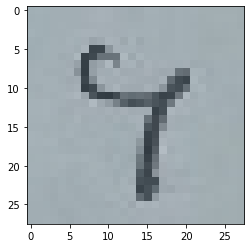

In [6]:
plt.imshow(sample_image)

In [7]:
X = [] 
y = []

In [8]:
for i in range(10):
    for j in range(20):
        image = cv2.imread(f'{images_path}/{i}--{j+1}.jpg') 
        image = func.conv_binary(image).astype(float) / 255 
        X.append(image)
        y.append(i) 

Text(0.5, 1.0, 'Label = 6')

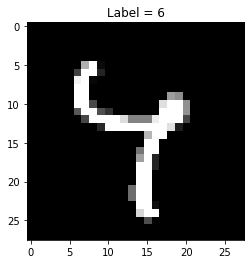

In [356]:
plt.imshow(X[122], cmap='gray')  
plt.title(f'Label = {y[122]}')

In [10]:
X = np.array(X) 
y = np.array(y)

In [11]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42) 
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.4, stratify=y_temp, random_state=42)

In [12]:
print(f'shape of training set : {X_train.shape}')
print(f'shape of test set : {X_test.shape}')
print(f'shape of validation set : {X_val.shape}') 

shape of training set : (150, 28, 28)
shape of test set : (30, 28, 28)
shape of validation set : (20, 28, 28)


# First model : ANN

In [20]:
ann_model_v1 = Sequential()
ann_model_v1.add(Flatten(input_shape=(28,28))) 
ann_model_v1.add(Dense(128,activation="relu"))
ann_model_v1.add(Dense(10,activation="softmax"))  

In [21]:
ann_model_v1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
ann_model_v1.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [23]:
info = ann_model_v1.fit(X_train,y_train,epochs=25,validation_data=(X_val, y_val))

Epoch 1/25
5/5 [==============================] - 1s 38ms/step - loss: 2.1952 - accuracy: 0.2133 - val_loss: 1.8587 - val_accuracy: 0.4500
Epoch 2/25
5/5 [==============================] - 0s 11ms/step - loss: 1.6669 - accuracy: 0.6333 - val_loss: 1.4885 - val_accuracy: 0.7000
Epoch 3/25
5/5 [==============================] - 0s 9ms/step - loss: 1.2854 - accuracy: 0.8533 - val_loss: 1.2009 - val_accuracy: 0.7000
Epoch 4/25
5/5 [==============================] - 0s 9ms/step - loss: 0.9928 - accuracy: 0.9267 - val_loss: 0.9786 - val_accuracy: 0.8000
Epoch 5/25
5/5 [==============================] - 0s 9ms/step - loss: 0.7696 - accuracy: 0.9400 - val_loss: 0.8291 - val_accuracy: 0.8000
Epoch 6/25
5/5 [==============================] - 0s 9ms/step - loss: 0.6129 - accuracy: 0.9400 - val_loss: 0.7252 - val_accuracy: 0.7500
Epoch 7/25
5/5 [==============================] - 0s 9ms/step - loss: 0.4956 - accuracy: 0.9533 - val_loss: 0.6515 - val_accuracy: 0.7500
Epoch 8/25
5/5 [================

In [24]:
prob_pred = ann_model_v1.predict(X_test)

1/1 [==============================] - 0s 74ms/step


In [25]:
pred = prob_pred.argmax(axis=1) 

In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.75      1.00      0.86         3
           2       0.50      0.67      0.57         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3

    accuracy                           0.90        30
   macro avg       0.93      0.90      0.90        30
weighted avg       0.93      0.90      0.90        30



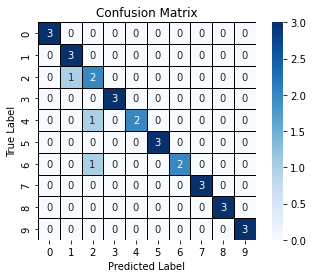

In [27]:
func.conf_plot(confusion_matrix(y_test, pred))

Text(0.5, 1.0, 'predicted : 4')

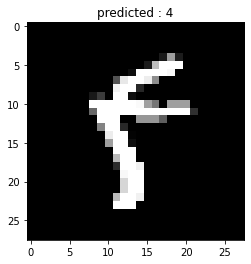

In [28]:
plt.imshow(X_test[13], cmap='gray') 
plt.title(f'predicted : {pred[13]}')

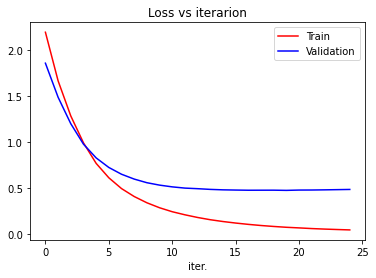

In [29]:
func.loss_plot(info.history)

# Second model : CNN

In [350]:
cnn_model_v1 = Sequential() 
cnn_model_v1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model_v1.add(MaxPool2D((2, 2)))
cnn_model_v1.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_v1.add(MaxPool2D((2, 2))) 
cnn_model_v1.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_v1.add(MaxPool2D((2, 2)))
cnn_model_v1.add(Flatten())
cnn_model_v1.add(Dense(32, activation='relu'))
cnn_model_v1.add(Dense(10, activation='softmax'))

In [351]:
cnn_model_v1.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 1, 1, 64)        

In [338]:
cnn_model_v1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [339]:
info = cnn_model_v1.fit(X_train,y_train,epochs=25, validation_data=(X_val, y_val))

Epoch 1/25
5/5 [==============================] - 3s 192ms/step - loss: 2.2735 - accuracy: 0.1000 - val_loss: 2.2195 - val_accuracy: 0.1500
Epoch 2/25
5/5 [==============================] - 0s 39ms/step - loss: 2.1836 - accuracy: 0.1867 - val_loss: 2.1172 - val_accuracy: 0.3000
Epoch 3/25
5/5 [==============================] - 0s 45ms/step - loss: 2.0543 - accuracy: 0.4267 - val_loss: 1.9698 - val_accuracy: 0.5000
Epoch 4/25
5/5 [==============================] - 0s 42ms/step - loss: 1.8584 - accuracy: 0.6067 - val_loss: 1.7260 - val_accuracy: 0.6500
Epoch 5/25
5/5 [==============================] - 0s 40ms/step - loss: 1.5946 - accuracy: 0.6667 - val_loss: 1.4366 - val_accuracy: 0.7000
Epoch 6/25
5/5 [==============================] - 0s 44ms/step - loss: 1.2629 - accuracy: 0.7933 - val_loss: 1.1065 - val_accuracy: 0.8000
Epoch 7/25
5/5 [==============================] - 0s 41ms/step - loss: 0.9120 - accuracy: 0.8000 - val_loss: 0.8051 - val_accuracy: 0.8000
Epoch 8/25
5/5 [==========

In [340]:
prob_pred = cnn_model_v1.predict(X_test)

1/1 [==============================] - 0s 284ms/step


In [341]:
pred = prob_pred.argmax(axis=1) 

In [342]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.67      0.80         3
           3       0.60      1.00      0.75         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3

    accuracy                           0.93        30
   macro avg       0.96      0.93      0.93        30
weighted avg       0.96      0.93      0.94        30



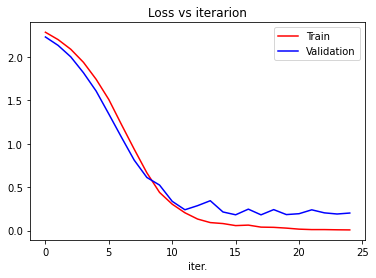

In [37]:
func.loss_plot(info.history)

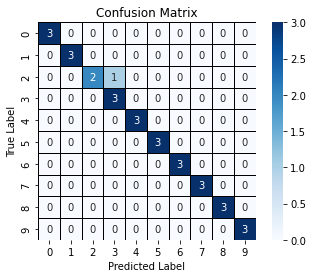

In [38]:
func.conf_plot(confusion_matrix(y_test, pred))

# Data augmentation

In [357]:
augmenter = ImageDataGenerator(
    rotation_range=30,  
    horizontal_flip=True,
    vertical_flip=False
   )

In [358]:
X = X.reshape(X.shape[0], 28, 28, 1)
X_augmented = []
y_augmented = []

for i in range(X.shape[0]):
    original_image = X[i]
    original_label = y[i]

    original_image = original_image.reshape(1, 28, 28, 1)
    augmented_images = []

    for _ in range(4):  
        augmented_image = next(augmenter.flow(original_image, batch_size=1))[0]
        augmented_images.append(augmented_image)

    X_augmented.extend([original_image[0]] + augmented_images)
    y_augmented.extend([original_label] * 5)

In [41]:
X_augmented = np.array(X_augmented) 
y_augmented = np.array(y_augmented)

6

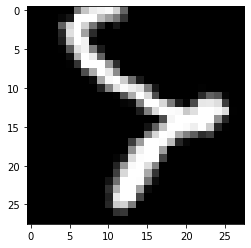

In [42]:
plt.imshow(X_augmented[666], cmap='gray') 
y_augmented[666]

In [43]:
X_augmented = X_augmented.reshape(X_augmented.shape[0], 28, 28)

In [44]:
X_train_augmented, X_temp, y_train_augmented, y_temp = train_test_split(X_augmented, y_augmented, test_size=0.25, stratify=y_augmented, random_state=42)
X_test_augmented, X_val_augmented, y_test_augmented, y_val_augmented = train_test_split(X_temp, y_temp, test_size=0.4, stratify=y_temp, random_state=42)

In [45]:
# ann_model_v2 = Sequential()

# ann_model_v2.add(Flatten(input_shape=(28,28))) 
# ann_model_v2.add(Dense(128,activation="relu")) 
# # ann_model_v2.add(Dense(256,activation="relu")) 
# # ann_model_v2.add(Dense(32,activation="relu"))
# ann_model_v2.add(Dense(10,activation="softmax"))  

In [46]:
# ann_model_v2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Testing previous ANN on augmneted data

In [47]:
prob_pred = ann_model_v1.predict(X_test_augmented) 
pred = prob_pred.argmax(axis=1) 
print(classification_report(y_test_augmented, pred))

5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       0.92      0.73      0.81        15
           2       0.64      0.47      0.54        15
           3       0.59      0.67      0.62        15
           4       0.57      0.53      0.55        15
           5       0.80      0.80      0.80        15
           6       0.62      0.67      0.65        15
           7       0.83      1.00      0.91        15
           8       0.83      0.67      0.74        15
           9       0.69      0.73      0.71        15

    accuracy                           0.73       150
   macro avg       0.73      0.73      0.72       150
weighted avg       0.73      0.73      0.72       150



# Training same ANN on augmented data

In [48]:
info = ann_model_v1.fit(X_train_augmented, y_train_augmented, epochs=15, validation_data=(X_val_augmented, y_val_augmented))

Epoch 1/15
24/24 [==============================] - 0s 6ms/step - loss: 1.1294 - accuracy: 0.6787 - val_loss: 0.7878 - val_accuracy: 0.7200
Epoch 2/15
24/24 [==============================] - 0s 4ms/step - loss: 0.5105 - accuracy: 0.8427 - val_loss: 0.7043 - val_accuracy: 0.7400
Epoch 3/15
24/24 [==============================] - 0s 3ms/step - loss: 0.3625 - accuracy: 0.9027 - val_loss: 0.6432 - val_accuracy: 0.7600
Epoch 4/15
24/24 [==============================] - 0s 4ms/step - loss: 0.2755 - accuracy: 0.9293 - val_loss: 0.5766 - val_accuracy: 0.8200
Epoch 5/15
24/24 [==============================] - 0s 5ms/step - loss: 0.2228 - accuracy: 0.9533 - val_loss: 0.5695 - val_accuracy: 0.7700
Epoch 6/15
24/24 [==============================] - 0s 5ms/step - loss: 0.1923 - accuracy: 0.9627 - val_loss: 0.5639 - val_accuracy: 0.8100
Epoch 7/15
24/24 [==============================] - 0s 5ms/step - loss: 0.1573 - accuracy: 0.9773 - val_loss: 0.5477 - val_accuracy: 0.8200
Epoch 8/15
24/24 [==

In [49]:
prob_pred = ann_model_v1.predict(X_test_augmented)

5/5 [==============================] - 0s 2ms/step


In [50]:
pred = prob_pred.argmax(axis=1)

In [51]:
print(classification_report(y_test_augmented, pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.93      0.97        15
           2       0.68      0.87      0.76        15
           3       0.75      0.80      0.77        15
           4       1.00      0.73      0.85        15
           5       1.00      0.93      0.97        15
           6       0.92      0.80      0.86        15
           7       1.00      1.00      1.00        15
           8       0.94      1.00      0.97        15
           9       0.88      0.93      0.90        15

    accuracy                           0.90       150
   macro avg       0.91      0.90      0.90       150
weighted avg       0.91      0.90      0.90       150



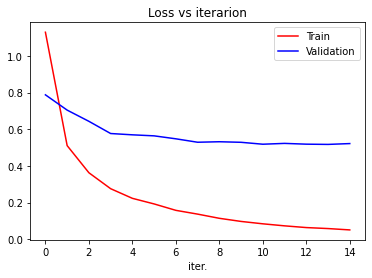

In [52]:
func.loss_plot(info.history)

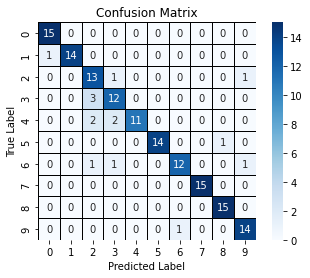

In [53]:
func.conf_plot(confusion_matrix(y_test_augmented, pred))

# Testing augmented data on previous CNN

In [54]:
prob_pred = cnn_model_v1.predict(X_test_augmented) 
pred = prob_pred.argmax(axis=1) 
print(classification_report(y_test_augmented, pred))

5/5 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       0.92      0.80      0.86        15
           2       0.86      0.40      0.55        15
           3       0.90      0.60      0.72        15
           4       0.40      0.40      0.40        15
           5       0.76      0.87      0.81        15
           6       0.67      0.80      0.73        15
           7       0.93      0.93      0.93        15
           8       0.75      0.80      0.77        15
           9       0.52      0.73      0.61        15

    accuracy                           0.73       150
   macro avg       0.76      0.73      0.73       150
weighted avg       0.76      0.73      0.73       150



In [55]:
# cnn_model = Sequential()
# cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# cnn_model.add(MaxPool2D((2, 2)))   
# cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# cnn_model.add(MaxPool2D((2, 2)))  
# cnn_model.add(Flatten()) 
# cnn_model.add(Dense(32, activation='relu'))
# cnn_model.add(Dense(10, activation='softmax'))

In [56]:
# cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training same CNN on augmented data

In [57]:
info = cnn_model_v1.fit(X_train_augmented, y_train_augmented, epochs=25, validation_data=(X_val_augmented, y_val_augmented))

Epoch 1/25
24/24 [==============================] - 0s 11ms/step - loss: 1.4825 - accuracy: 0.6387 - val_loss: 0.8289 - val_accuracy: 0.7100
Epoch 2/25
24/24 [==============================] - 0s 9ms/step - loss: 0.6796 - accuracy: 0.7827 - val_loss: 0.5365 - val_accuracy: 0.8300
Epoch 3/25
24/24 [==============================] - 0s 9ms/step - loss: 0.4366 - accuracy: 0.8560 - val_loss: 0.3831 - val_accuracy: 0.8900
Epoch 4/25
24/24 [==============================] - 0s 10ms/step - loss: 0.3413 - accuracy: 0.8867 - val_loss: 0.3763 - val_accuracy: 0.8800
Epoch 5/25
24/24 [==============================] - 0s 9ms/step - loss: 0.2775 - accuracy: 0.9160 - val_loss: 0.3394 - val_accuracy: 0.8700
Epoch 6/25
24/24 [==============================] - 0s 9ms/step - loss: 0.2220 - accuracy: 0.9227 - val_loss: 0.3032 - val_accuracy: 0.8500
Epoch 7/25
24/24 [==============================] - 0s 9ms/step - loss: 0.1809 - accuracy: 0.9453 - val_loss: 0.2976 - val_accuracy: 0.9000
Epoch 8/25
24/24 [

In [58]:
prob_pred = cnn_model_v1.predict(X_test_augmented)

5/5 [==============================] - 0s 4ms/step


In [59]:
pred = prob_pred.argmax(axis=1) 

In [60]:
print(classification_report(y_test_augmented, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.86      0.80      0.83        15
           3       0.94      1.00      0.97        15
           4       0.93      0.87      0.90        15
           5       1.00      1.00      1.00        15
           6       0.93      0.93      0.93        15
           7       1.00      1.00      1.00        15
           8       0.94      1.00      0.97        15
           9       0.88      0.93      0.90        15

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



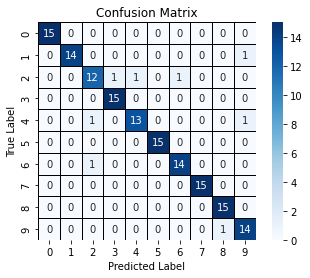

In [61]:
func.conf_plot(confusion_matrix(y_test_augmented, pred))

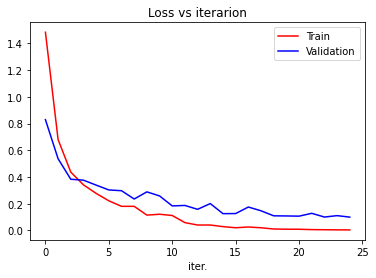

In [62]:
func.loss_plot(info.history)

In [63]:
import gzip, sys, pickle
f = gzip.open('./mnist.pkl.gz', 'rb')
if sys.version_info < (3,):
    data = pickle.load(f)
else:
    data = pickle.load(f, encoding='bytes')
f.close()
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = data

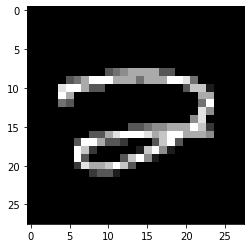

In [64]:
plt.imshow(X_train_mnist[1888], cmap='gray')

# Training a CNN as a base model for transfer learning on MNIST

In [65]:
base_model = Sequential()
base_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
base_model.add(MaxPool2D((2, 2)))   
base_model.add(Conv2D(64, (3, 3), activation='relu'))
base_model.add(MaxPool2D((2, 2)))  
base_model.add(Conv2D(128, (3, 3), activation='relu'))
base_model.add(MaxPool2D((2, 2))) 
base_model.add(Flatten()) 
base_model.add(Dense(32, activation='relu'))
base_model.add(Dense(10, activation='softmax'))

In [66]:
base_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

info = base_model.fit(X_train_mnist, y_train_mnist, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 15s 8ms/step - loss: 0.2736 - accuracy: 0.9277 - val_loss: 0.0876 - val_accuracy: 0.9725
Epoch 2/10
1688/1688 [==============================] - 18s 10ms/step - loss: 0.0812 - accuracy: 0.9757 - val_loss: 0.0640 - val_accuracy: 0.9802
Epoch 3/10
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0631 - accuracy: 0.9810 - val_loss: 0.0722 - val_accuracy: 0.9782
Epoch 4/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0504 - accuracy: 0.9845 - val_loss: 0.0618 - val_accuracy: 0.9843
Epoch 5/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.0433 - accuracy: 0.9870 - val_loss: 0.0482 - val_accuracy: 0.9858
Epoch 6/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0377 - accuracy: 0.9882 - val_loss: 0.0483 - val_accuracy: 0.9863
Epoch 7/10
1688/1688 [==============================] - 32s 19ms/step - loss: 0.0306 - accuracy: 0.9903 - val_loss: 0.0495 - 

In [67]:
prob_pred = base_model.predict(X_test_mnist)

313/313 [==============================] - 2s 6ms/step


In [68]:
pred = prob_pred.argmax(axis=1) 

In [69]:
print(classification_report(y_test_mnist, pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.96      0.99      0.98       892
           6       0.99      0.96      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



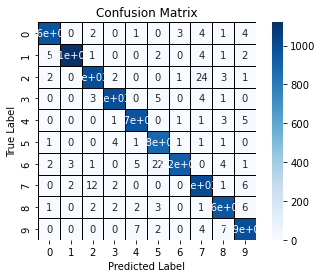

In [70]:
func.conf_plot(confusion_matrix(y_test_mnist, pred))

# Making the final model with some layers of pre-trained CNN as base model

In [290]:
final_model = Sequential(base_model.layers[:2])   
final_model.add(Conv2D(128, (3, 3), activation='relu'))
final_model.add(MaxPool2D((2, 2))) 
final_model.add(Flatten()) 
final_model.add(Dense(32, activation='relu'))
final_model.add(Dense(10, activation='softmax')) 

for layer in final_model.layers[:2]:
    layer.trainable = False

In [291]:
final_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 5, 5, 128)         0         
 ng2D)                                                           
                                                                 
 flatten_14 (Flatten)        (None, 3200)              0         
                                                                 
 dense_28 (Dense)            (None, 32)              

In [292]:
final_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
info = final_model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val))

Epoch 1/25
5/5 [==============================] - 2s 116ms/step - loss: 2.3038 - accuracy: 0.0867 - val_loss: 2.2579 - val_accuracy: 0.1500
Epoch 2/25
5/5 [==============================] - 0s 30ms/step - loss: 2.2401 - accuracy: 0.2267 - val_loss: 2.1966 - val_accuracy: 0.3500
Epoch 3/25
5/5 [==============================] - 0s 34ms/step - loss: 2.1645 - accuracy: 0.2600 - val_loss: 2.1146 - val_accuracy: 0.2000
Epoch 4/25
5/5 [==============================] - 0s 34ms/step - loss: 2.0641 - accuracy: 0.3600 - val_loss: 2.0077 - val_accuracy: 0.4000
Epoch 5/25
5/5 [==============================] - 0s 38ms/step - loss: 1.9457 - accuracy: 0.5400 - val_loss: 1.8677 - val_accuracy: 0.6000
Epoch 6/25
5/5 [==============================] - 0s 40ms/step - loss: 1.7921 - accuracy: 0.6333 - val_loss: 1.7010 - val_accuracy: 0.7000
Epoch 7/25
5/5 [==============================] - 0s 38ms/step - loss: 1.6165 - accuracy: 0.6933 - val_loss: 1.5164 - val_accuracy: 0.6000
Epoch 8/25
5/5 [==========

In [105]:
prob_pred = final_model.predict(X_test)

1/1 [==============================] - 0s 55ms/step


In [106]:
pred = prob_pred.argmax(axis=1) 

In [107]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       0.67      0.67      0.67         3
           3       0.75      1.00      0.86         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



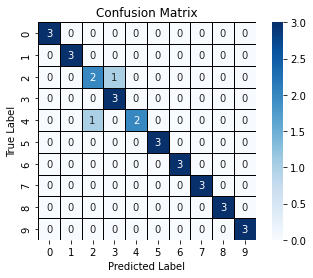

In [108]:
func.conf_plot(confusion_matrix(y_test, pred))

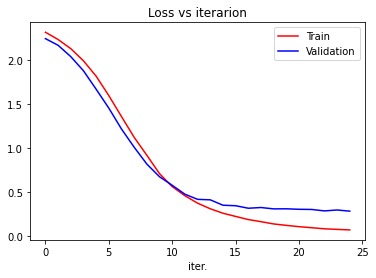

In [109]:
func.loss_plot(info.history)

In [345]:
image = cv2.imread('./4591.jpg', cv2.IMREAD_GRAYSCALE)
digits = func.split_digits(image, 110)

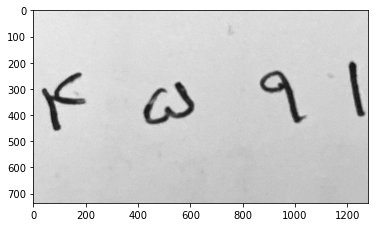

In [346]:
plt.imshow(image, cmap='gray')

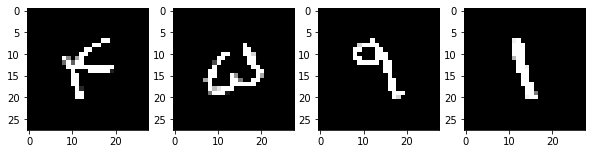

In [347]:
fig, axes = plt.subplots(1, len(digits), figsize=(10, 6)) 
axes.reshape(1, -1)
for i, ax in enumerate(axes.flatten()):
    ax.imshow(digits[i], cmap='gray')

In [348]:
number = 0
for digit in digits:
    number = number * 10 + cnn_model_v1.predict(digit.reshape(1,28,28)).argmax(axis=1)[0]

1/1 [==============================] - 0s 52ms/step


In [349]:
number

4591